# Thompson Sampling

We are going to use again the multi armed Bandit Problem used for the UCP explanation.

<img src="img/MABP.png" width="400" height="200">

<img src="img/MABP_picture.png" width="400" height="200">

To solve this we are going to use the __Bayesion inference__

<img src="img/bayesian_inference.png" width="400" height="200">

## Thompson Sampling Algorithm

Let's start by looking at the expected returns of 3 machines. 
Each return is a part of the distribution of a machine, but we don't know the kind of distribution.

<img src="img/TSA_1.png" width="400" height="200">

We don't know anything at the start.
So after some try rounds on a machine, the Thompson Sampling algo will construct a distribution using the return values of each round.

<img src="img/TSA_2.png" width="400" height="200">

__Each distribution is showing us where we think the expected return value is_

__We are not trying to guess the distributions behind the machines_

<img src="img/TSA_3.png" width="400" height="200">

We see that the __Thompson Sampling__ is a __probalistic__ algo and the __UCB__ is a __determinist__ algo.

During several round , the algo is triggering distributions to generate a our own bandit configuration and new values. 
We chose the values with the best distribution and use the value to adjust the distribution by projecting the value in the context. The value will be closer to the expected value.

<img src="img/TSA_4.png" width="400" height="200">


<img src="img/TSA_5.png" width="400" height="200">


<img src="img/TSA_6.png" width="400" height="200">

### Next round

<img src="img/TSA_7.png" width="400" height="200">


<img src="img/TSA_8.png" width="400" height="200">


<img src="img/TSA_9.png" width="400" height="200">

and so on until we match the expected value.

<img src="img/TSA_10.png" width="400" height="200">

## UCB vs Thompson Sampling

Both algo solve the same problem. But what are the differences ?

<img src="img/TSA_UCB_1.png" width="600" height="400">

## Annexes

<img src="img/Thompson_Sampling_Slide.png" width="600" height="400">

<img src="img/bayesian_inference.png" width="400" height="200">

## Practical example

Let's start the practical example and import our dataset.

We are going to try to optimize the "click through rate" using different ads and users actions.

The dataset contains 10 different version of the ad of a company trying to sell low price SUV cars and they want to choose the best ad (which will get the best CTR) to post on a social network.

This dataset is a simulation because in real life we will post ads on social networks and define a strategy : each a time a user will be connected, we show him a version of the ad and if the user click we get a reward 1.

So we have each user on the lines and ads on the columns.


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


Let's try a random approach which will select randomly an ad on each round and sea the result.

Total reward : 1266


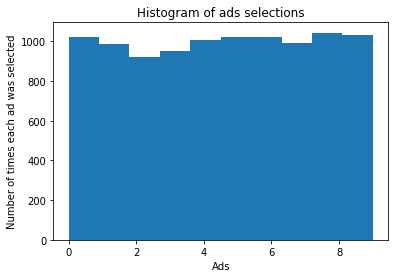

In [2]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

print("Total reward : {}".format(str(total_reward)))

# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

The results of the ads seem uniform because the random selection so it's more difficult to chose the best one to optimize our CTR.

Let's try now with the UCB algorithm. There are no current package available so we are going to build one using the detailed step of the UCB.

<img src="img/Thompson_Sampling_Slide.png" width="600" height="400">

### STEP 1

Declare both variables. 
We create a vector/list which will contain each value.

```python
# vector wich contains only 0
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
```

### STEP 2

```python

# For using random library and its betavariate function

import random


# Number of rounds
N = 1000

# Number of ads
d = 10

# For each round
for n in range(0, N):
    ad = 0
    max_random = 0
    
    # For each Ai
    for i in range(0, d):
        
        # Generate draw using the numbers of rewards 0,1
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        
        # Get the max value of the draw
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    
    # Update the ads selected vector with the chosen ad
    ads_selected.append(ad)
    
    # Selecting the reward by using the column and line index in the dataset     
    reward = dataset.values[n, ad]
    
    # Updating Vectors
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    
    # Total reward accumulated on each round
    total_reward = total_reward + reward
```


Total reward : 2599


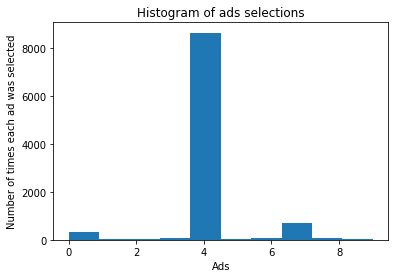

In [8]:
# Implementing Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

print("Total reward : {}".format(str(total_reward)))

# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

Total reward : 2178


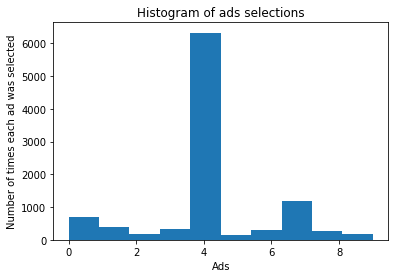

In [9]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

print("Total reward : {}".format(str(total_reward)))

# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

We get the same result using UCB and Thompson 

`We notice we have a better total reward and if we take a look to each ad by ploting each ad result, we see thaht the ad5 (index 4) will optimize our CTR.`

but when we look at the total rewards we see that the Thompson is more accurate.